In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Statistika/fastfood.csv')
df

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other


In [ ]:
df.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


# CHECK AND TREAT NULL


In [ ]:
df.isnull().sum()*100/515

restaurant     0.000000
item           0.000000
calories       0.000000
cal_fat        0.000000
total_fat      0.000000
sat_fat        0.000000
trans_fat      0.000000
cholesterol    0.000000
sodium         0.000000
total_carb     0.000000
fiber          2.330097
sugar          0.000000
protein        0.194175
salad          0.000000
dtype: float64

Karena vit a , vit b, dan calsium nullnya ada lebih dari 40%, maka kami memutuskan untuk menghapus kolom tersebut

In [ ]:
df = df.drop(['vit_a','vit_c','calcium'],axis="columns")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  salad        515 non-null    object 
dtypes: float64(4), int64(7), object(3)
memory usage: 56.5+ KB


**Filled some nan Value in fiber and protein**

In [ ]:
df.fillna(value = {'fiber' : df['fiber'].mean(),'protein' : df['protein'].mean()},inplace=True)

In [ ]:
df.isnull().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
salad          0
dtype: int64

<Axes: >

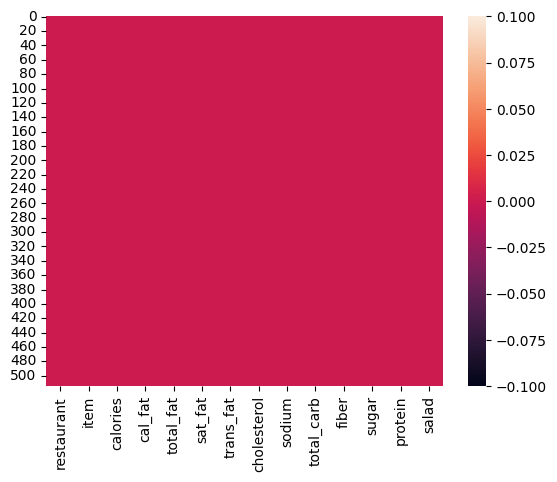

In [ ]:
sns.heatmap(df.isnull())

**Dari data diatas, sudah tidak ada yang null. oleh karena itu, dapat dilanjutkan pada proses selanjutnya**

YANG NULL KOK BANYAK BET DAH HUHU... TETEP SEMANGAT NET

# MAPPING CORRELATION

In [ ]:
print(df.nunique())

restaurant       8
item           505
calories       113
cal_fat        117
total_fat       80
sat_fat         40
trans_fat       10
cholesterol     52
sodium         197
total_carb     103
fiber           19
sugar           31
protein         71
salad            1
dtype: int64


dari daftar di atas, di dapat 71 protein yang berbeda-beda. it is a little bit tricky to make accuracy so high

In [ ]:
df.shape

(515, 14)

<ipython-input-159-4b208cf9896e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="Blues", annot=True)


<Axes: >

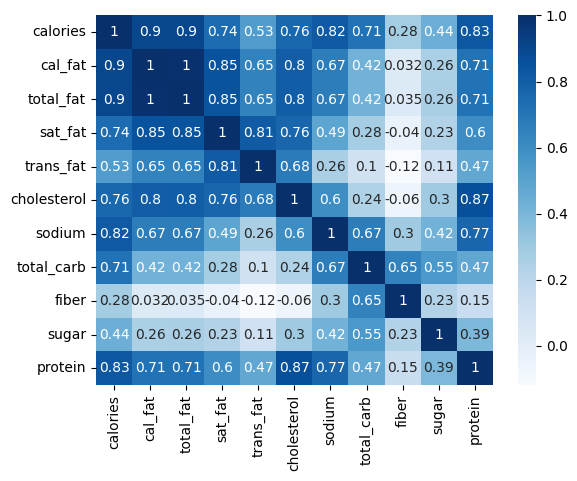

In [ ]:
sns.heatmap(df.corr(),cmap="Blues", annot=True)

In [ ]:
df.corr()['protein']

<ipython-input-160-23caccf0095a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['protein']


calories       0.827116
cal_fat        0.714484
total_fat      0.713592
sat_fat        0.597994
trans_fat      0.474686
cholesterol    0.865997
sodium         0.765928
total_carb     0.474196
fiber          0.146708
sugar          0.389461
protein        1.000000
Name: protein, dtype: float64

Dari kedua visualisasi di atas, dapat dilihat bahwa protein memiliki korelasi tinggi terhadap kalori, cal_fat, total_fat, kolesterol, dan sodium

In [ ]:
df.columns

Index(['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar',
       'protein', 'salad'],
      dtype='object')

In [ ]:
dfcop = df.copy()

In [ ]:
dfcop = dfcop.drop(['sat_fat','trans_fat', 'total_carb', 'fiber', 'sugar', 'salad'], axis='columns')
dfcop.head()

,restaurant,item,calories,cal_fat,total_fat,cholesterol,sodium,protein
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,95,1110,37.0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,130,1580,46.0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,220,1920,70.0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,155,1940,55.0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,120,1980,46.0


In [ ]:
data_predict = dfcop.copy()

# **USING DATA VISUALIZATION**

In [ ]:
result = dfcop.groupby('restaurant',  as_index=False).mean()
result

<ipython-input-169-51911d34e29f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = dfcop.groupby('restaurant',  as_index=False).mean()


,restaurant,calories,cal_fat,total_fat,cholesterol,sodium,protein
0,Arbys,532.727273,237.836364,26.981818,70.454545,1515.272727,29.254545
1,Burger King,608.571429,333.757143,36.814286,100.857143,1223.571429,29.984158
2,Chick Fil-A,384.444444,145.370370,16.148148,79.074074,1151.481481,31.703704
3,Dairy Queen,520.238095,260.476190,28.857143,71.547619,1181.785714,24.833333
4,Mcdonalds,640.350877,285.614035,31.807018,109.736842,1437.894737,40.298246
5,Sonic,631.698113,338.301887,37.641509,86.981132,1350.754717,29.188679
6,Subway,503.020833,165.104167,18.479167,61.302083,1272.968750,30.312500
7,Taco Bell,443.652174,188.000000,20.895652,39.043478,1013.913043,17.417391


In [ ]:
coba1 = dfcop.loc[(dfcop['restaurant']=='Burger King')]
coba1

,restaurant,item,calories,cal_fat,total_fat,cholesterol,sodium,protein
192,Burger King,American Brewhouse King,1550,1134,126,805,1820,134.0
193,Burger King,Bacon & Swiss Sourdough King,1000,585,65,200,1320,56.0
194,Burger King,Bacon Cheeseburger,330,140,16,55,830,18.0
195,Burger King,Bacon Cheeseburger Deluxe,290,120,14,40,720,12.0
196,Burger King,Bacon King,1040,630,48,220,1900,57.0
...,...,...,...,...,...,...,...,...
257,Burger King,4 Piece Spicy Chicken Nuggets,210,135,15,20,570,8.0
258,Burger King,Spicy Chicken Nuggets,530,333,37,55,1420,20.0
259,Burger King,Spicy Crispy Chicken Jr.,410,220,25,35,850,12.0
260,Burger King,Spicy Crispy Chicken Sandwich,700,378,42,65,1140,25.0


In [ ]:
rataProtein = dfcop.groupby('restaurant', as_index=False)[['protein']].mean()
rataProtein

,restaurant,protein
0,Arbys,29.254545
1,Burger King,29.984158
2,Chick Fil-A,31.703704
3,Dairy Queen,24.833333
4,Mcdonalds,40.298246
5,Sonic,29.188679
6,Subway,30.312500
7,Taco Bell,17.417391


In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i],y[i], ha = 'center',
                 clip_box = dict(facecolor = 'blue', fontsize = .9))

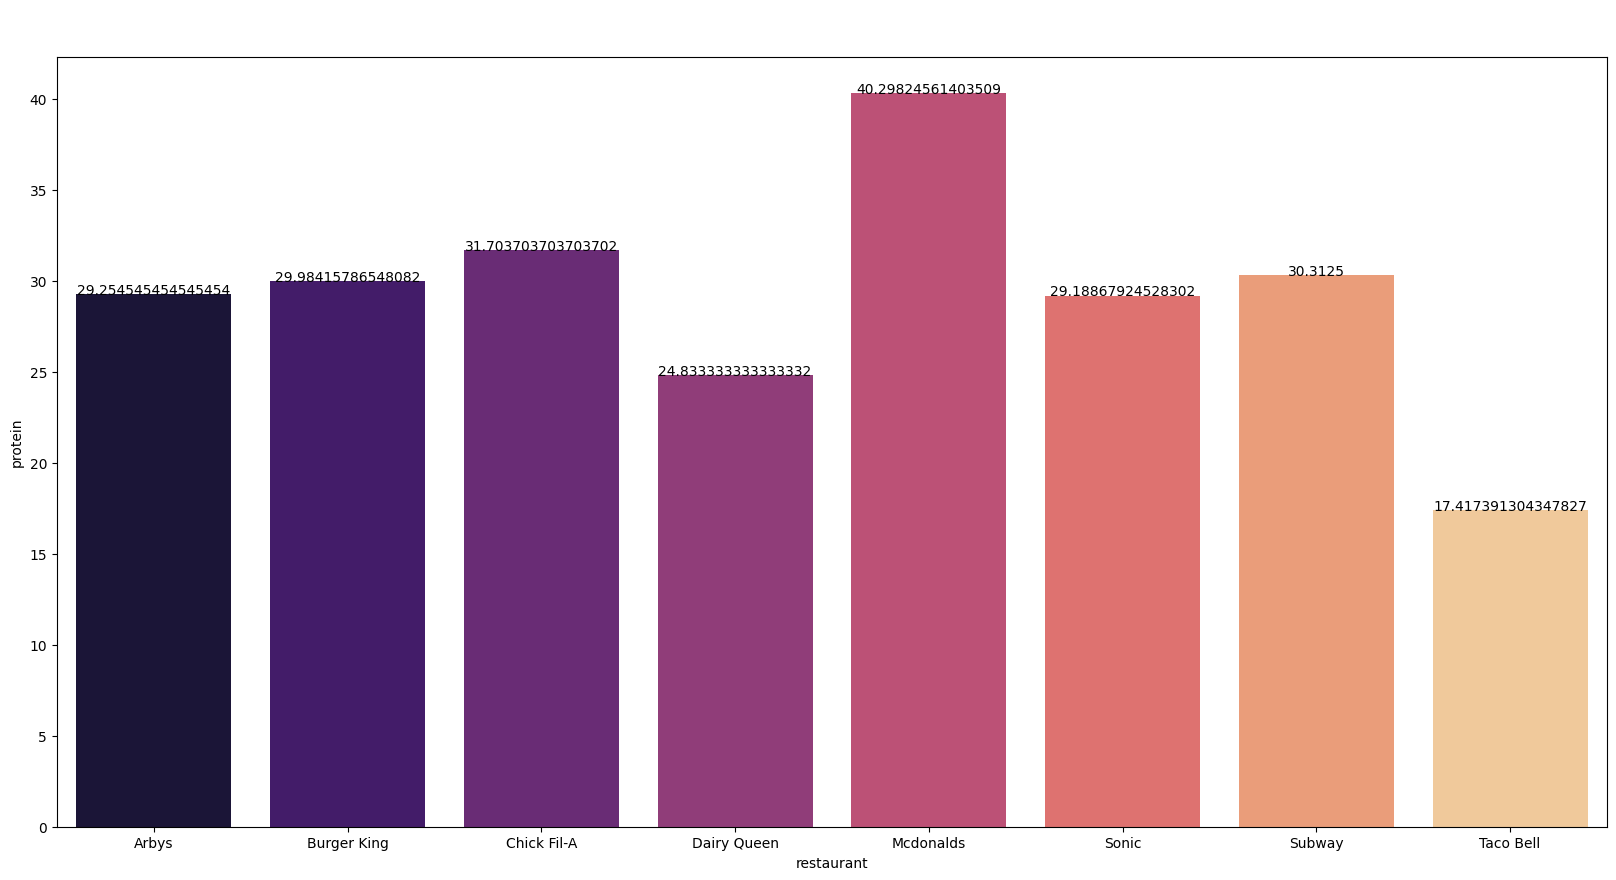

In [ ]:
x = rataProtein['restaurant']
y = rataProtein['protein']
fig = plt.figure(figsize=(20,10))
sns.barplot(data=rataProtein, x='restaurant', y='protein', palette='magma')
plt.title('Nama Restaurant dan rata-rata proteinnya\n', fontsize=15, color='white')
addlabels(x, y)

Dari data di atas, dapat disimpulkan bahwa restoran bernama McDonalds memiliki rata-rata protein paling tinggi

In [ ]:
maxProtein = dfcop.groupby('restaurant', as_index=False)[['item','protein']].max()
minProtein = dfcop.groupby('restaurant', as_index=False)[['item','protein']].min()

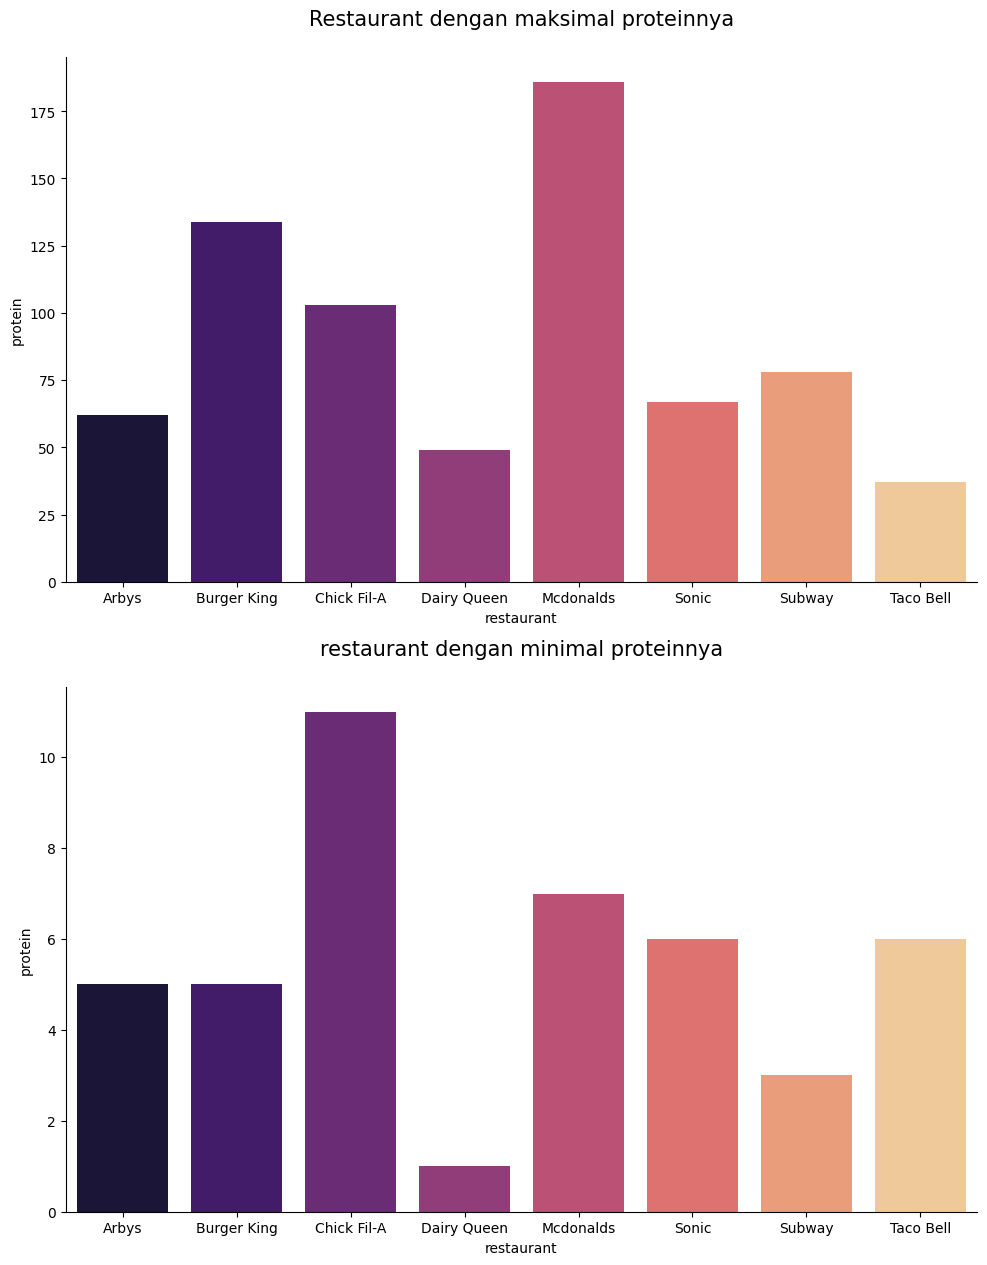

In [ ]:
fig = plt.figure(figsize=(40,15))
gs = fig.add_gridspec(2,3)
tabel1 = fig.add_subplot(gs[0,0])
sns.barplot(x='restaurant', y='protein', data=maxProtein, ax=tabel1, palette='magma')
plt.title('Restaurant dengan maksimal proteinnya\n', fontsize=15)
sns.despine()
tabel2 = fig.add_subplot(gs[1,0])
sns.barplot(x='restaurant', y='protein', data=minProtein, ax=tabel2, palette='magma')
plt.title('restaurant dengan minimal proteinnya\n', fontsize=15)
sns.despine()

Text(0.5, 1.0, 'Distribusi Protein di semua item')

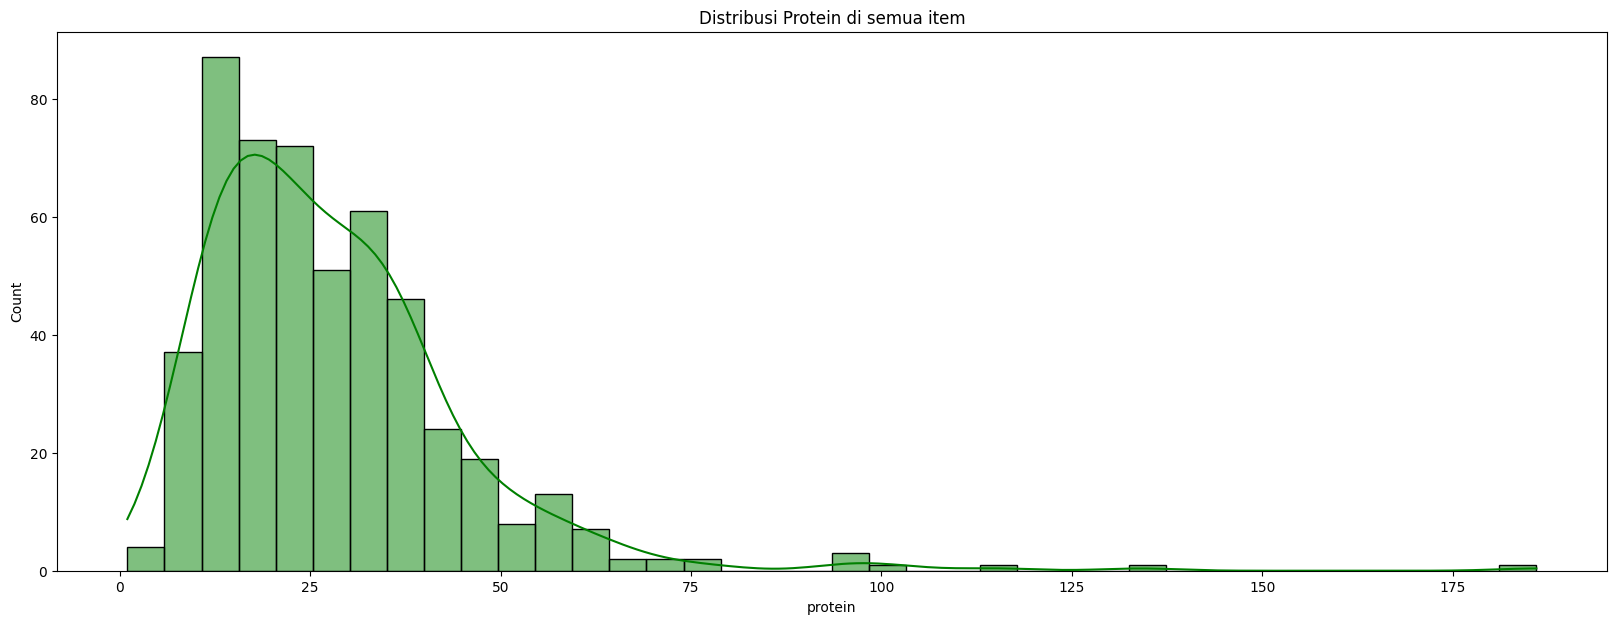

In [ ]:
plt.figure(figsize=(20, 7))
sns.histplot(x ='protein' ,data =dfcop   ,kde = True, color="green")
plt.title('Distribusi Protein di semua item')

dari visualisasi data di atas, dapat dilihat jika condong ke kanan

# SCATTER PLOT UNTUK PROTEIN DAN KORELASI TERTINGGINYA

PROTEIN DENGAN  kalori, cal_fat, total_fat, kolesterol, dan sodium

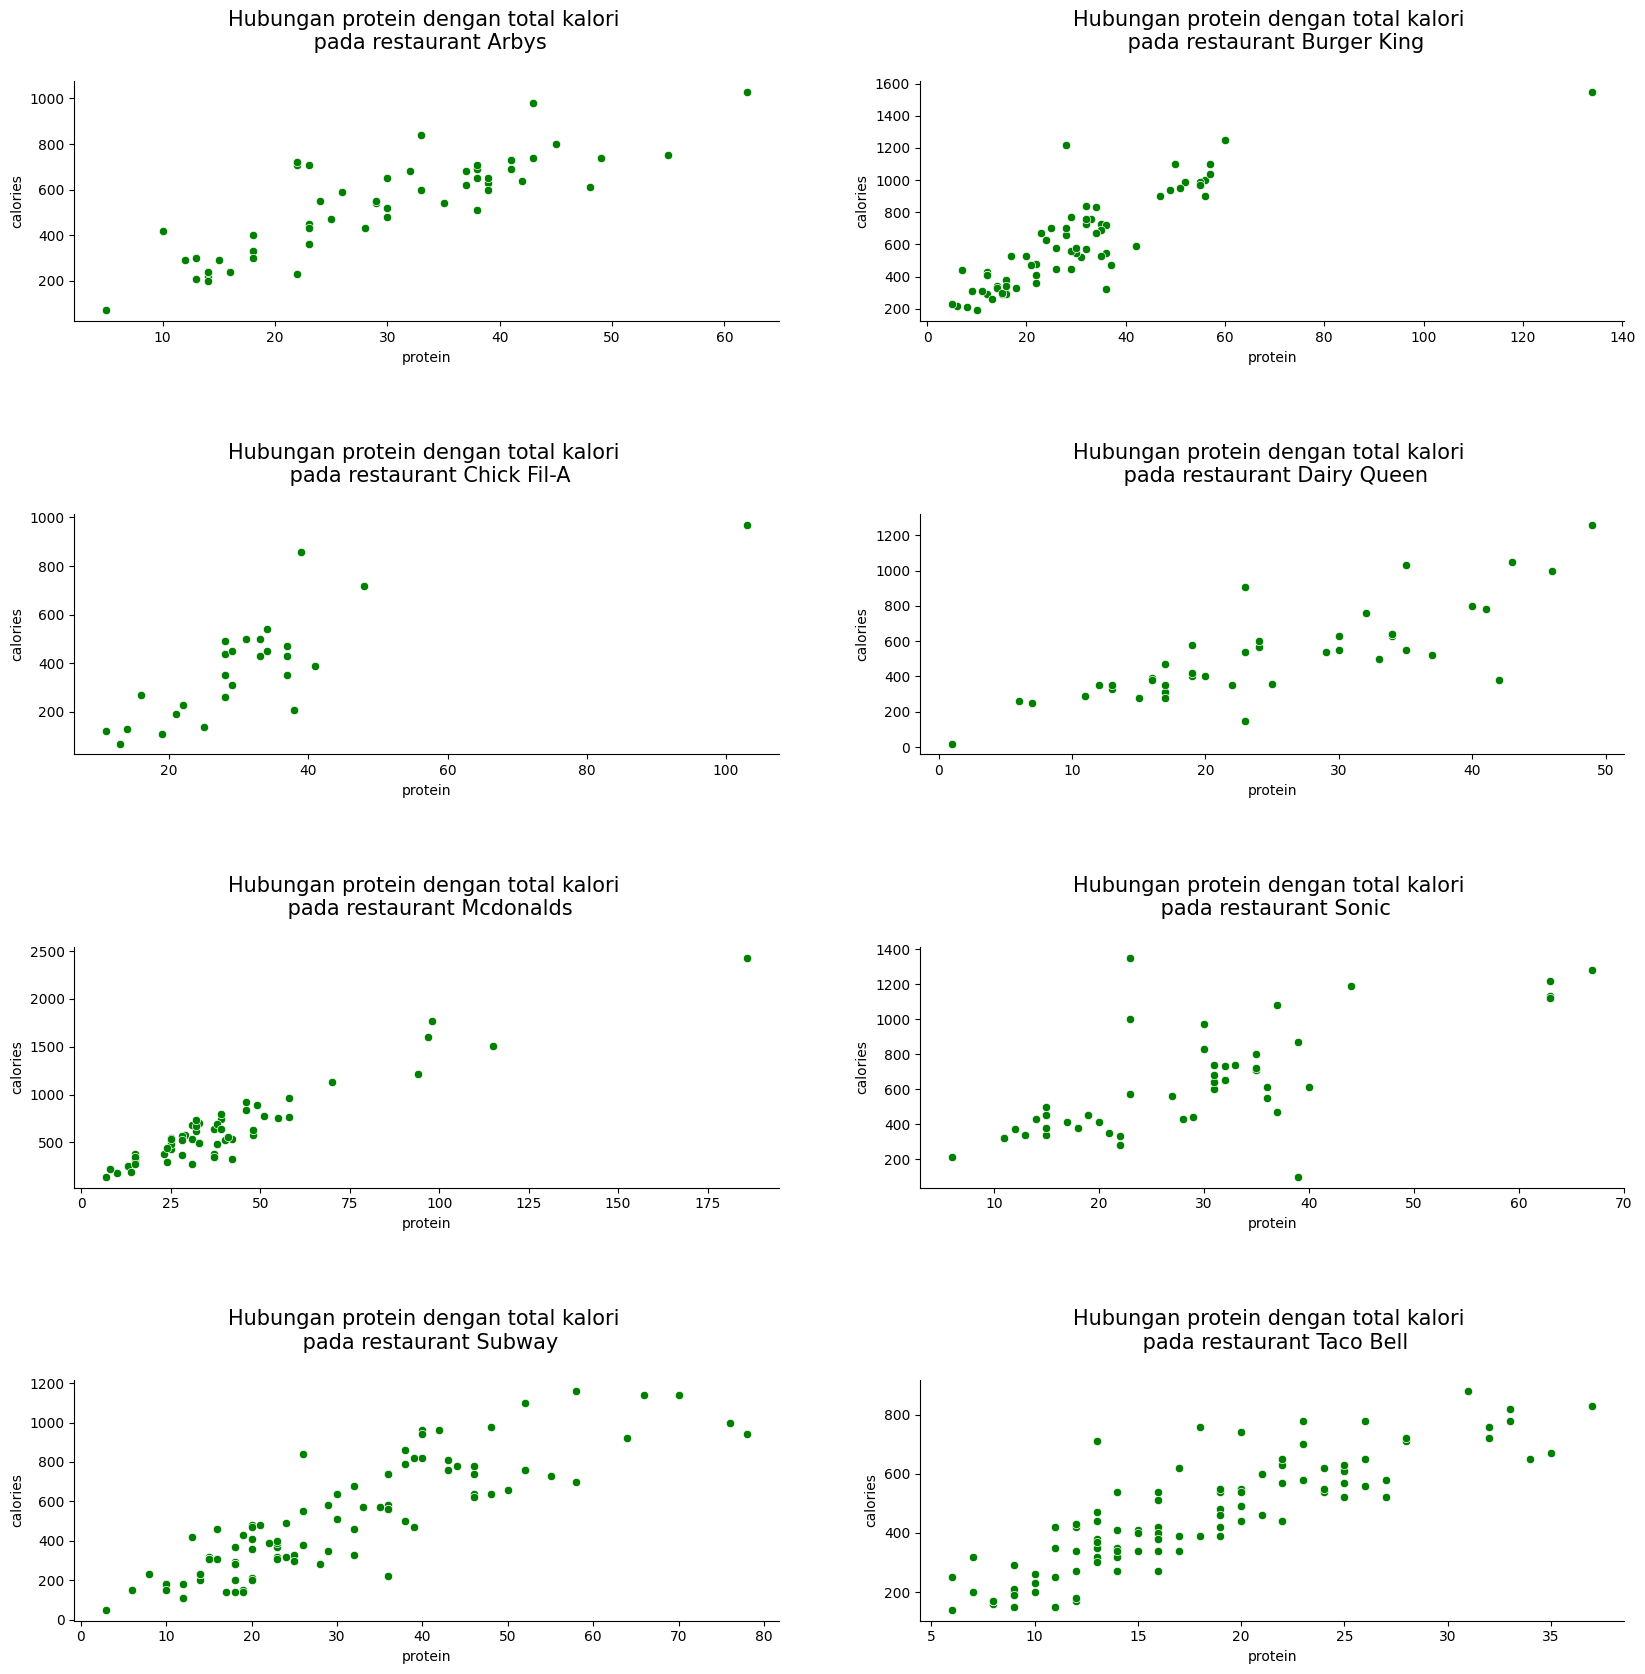

In [ ]:
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(4,2)
plt.subplots_adjust(hspace = 0.8)
tabel1 = fig.add_subplot(gs[0,0])
sns.scatterplot(data=df[df.restaurant=='Arbys'], x="protein", y="calories", color='green')
plt.title('Hubungan protein dengan total kalori \n pada restaurant Arbys\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[0,1])
sns.scatterplot(data=df[df.restaurant=='Burger King'], x="protein", y="calories", color='green')
plt.title('Hubungan protein dengan total kalori \n pada restaurant Burger King\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[1,0])
sns.scatterplot(data=df[df.restaurant=='Chick Fil-A'], x="protein", y="calories", color='green')
plt.title('Hubungan protein dengan total kalori \n pada restaurant Chick Fil-A\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[1,1])
sns.scatterplot(data=df[df.restaurant=='Dairy Queen'], x="protein", y="calories", color='green')
plt.title('Hubungan protein dengan total kalori \n pada restaurant Dairy Queen\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[2,0])
sns.scatterplot(data=df[df.restaurant=='Mcdonalds'], x="protein", y="calories", color='green')
plt.title('Hubungan protein dengan total kalori \n pada restaurant Mcdonalds\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[2,1])
sns.scatterplot(data=df[df.restaurant=='Sonic'], x="protein", y="calories", color='green')
plt.title('Hubungan protein dengan total kalori \n pada restaurant Sonic\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[3,0])
sns.scatterplot(data=df[df.restaurant=='Subway'], x="protein", y="calories", color='green')
plt.title('Hubungan protein dengan total kalori \n pada restaurant Subway\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[3,1])
sns.scatterplot(data=df[df.restaurant=='Taco Bell'], x="protein", y="calories", color='green')
plt.title('Hubungan protein dengan total kalori \n pada restaurant Taco Bell\n', fontsize=15)
sns.despine()

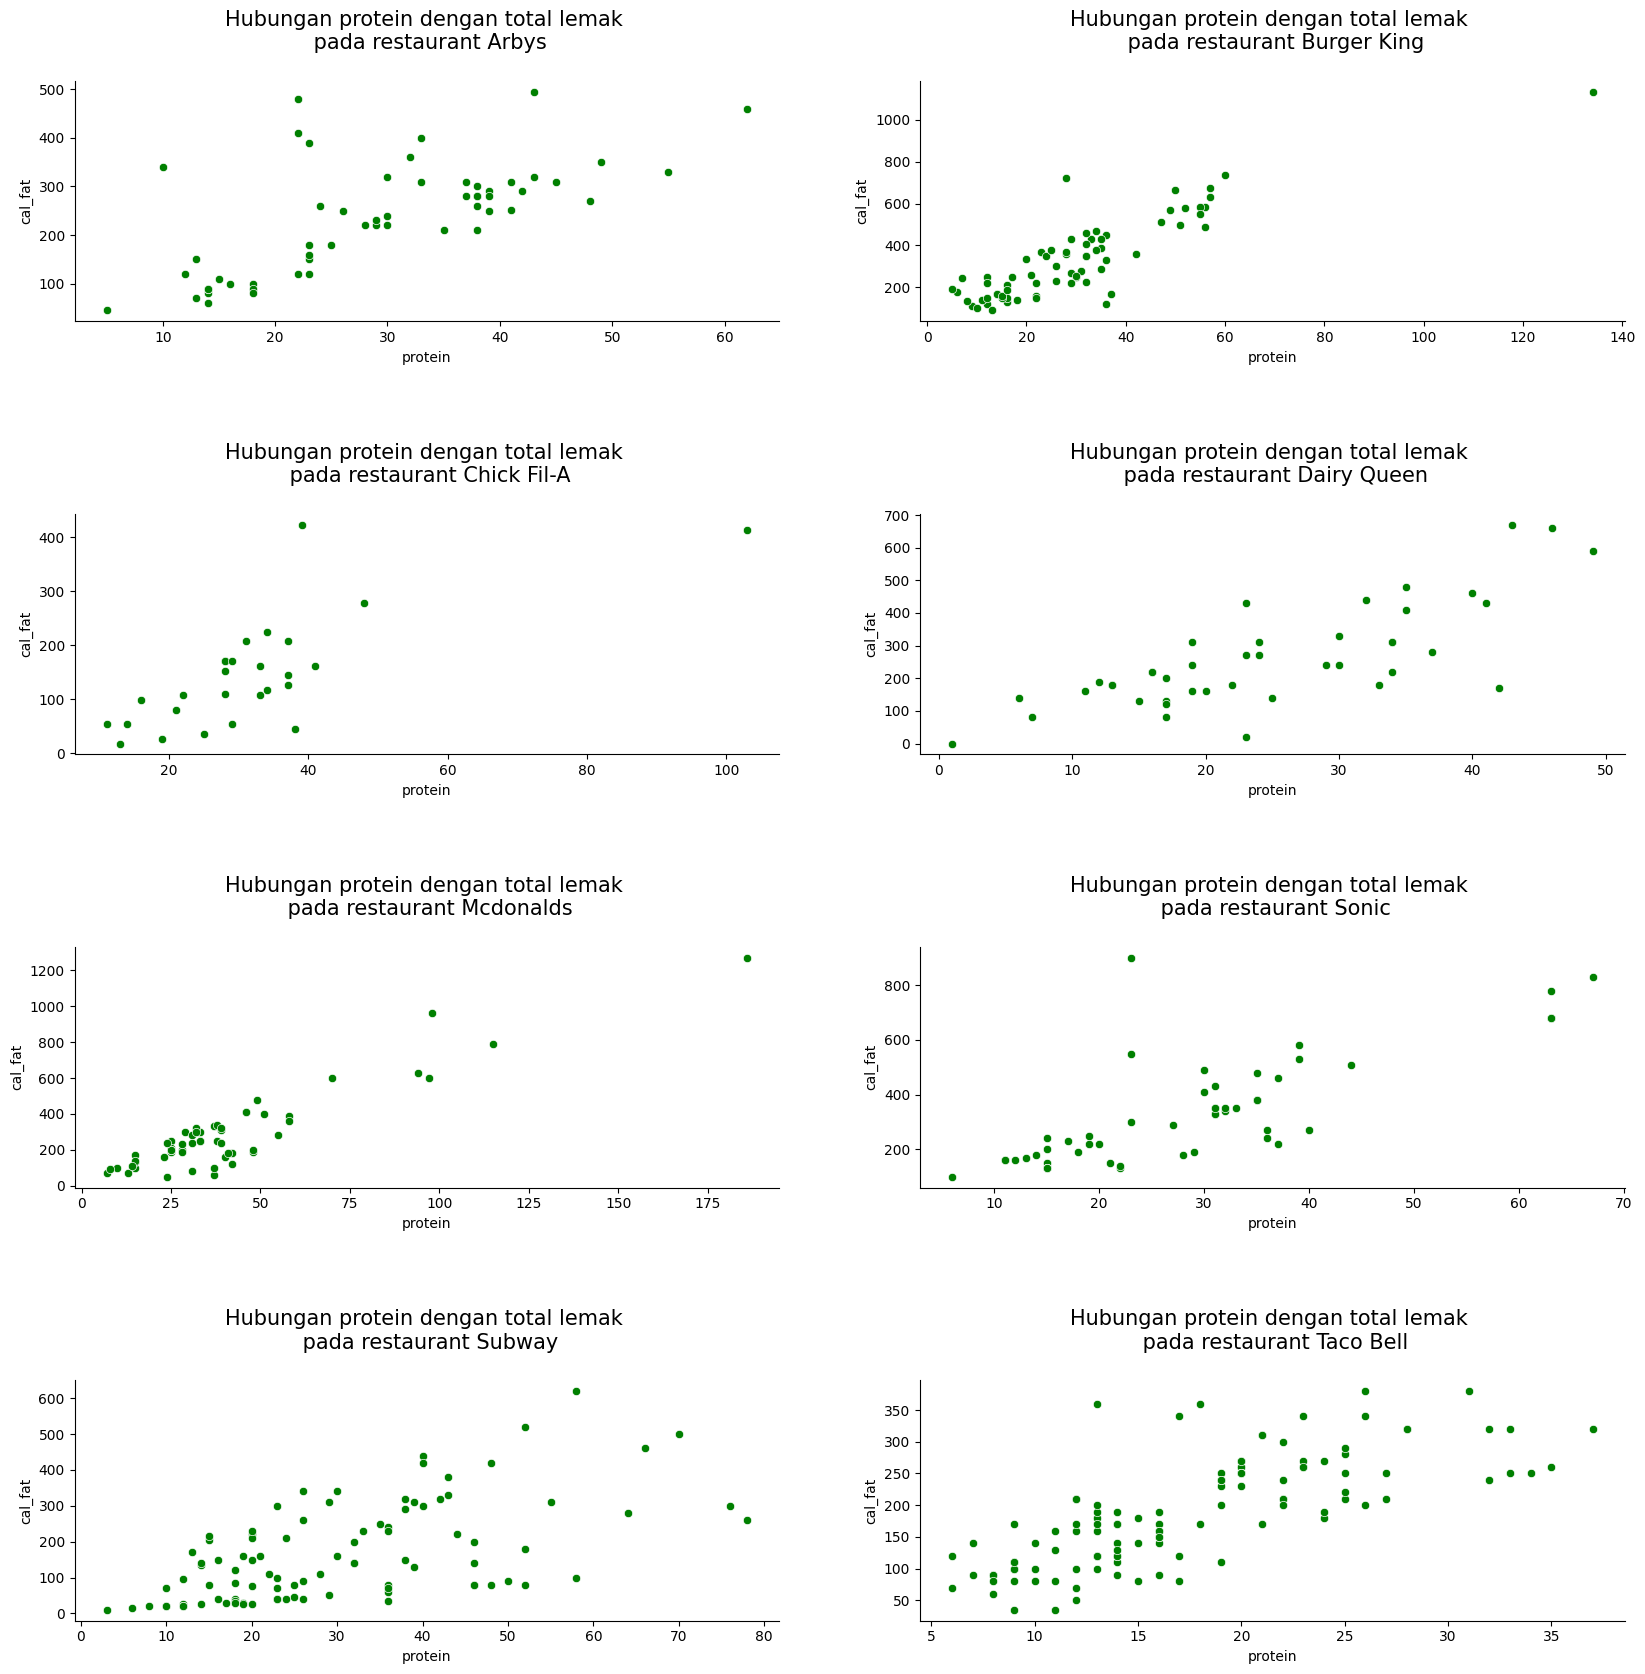

In [ ]:
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(4,2)
plt.subplots_adjust(hspace = 0.8)
tabel1 = fig.add_subplot(gs[0,0])
sns.scatterplot(data=df[df.restaurant=='Arbys'], x="protein", y="cal_fat", color='green')
plt.title('Hubungan protein dengan total lemak \n pada restaurant Arbys\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[0,1])
sns.scatterplot(data=df[df.restaurant=='Burger King'], x="protein", y="cal_fat", color='green')
plt.title('Hubungan protein dengan total lemak \n pada restaurant Burger King\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[1,0])
sns.scatterplot(data=df[df.restaurant=='Chick Fil-A'], x="protein", y="cal_fat", color='green')
plt.title('Hubungan protein dengan total lemak \n pada restaurant Chick Fil-A\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[1,1])
sns.scatterplot(data=df[df.restaurant=='Dairy Queen'], x="protein", y="cal_fat", color='green')
plt.title('Hubungan protein dengan total lemak \n pada restaurant Dairy Queen\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[2,0])
sns.scatterplot(data=df[df.restaurant=='Mcdonalds'], x="protein", y="cal_fat", color='green')
plt.title('Hubungan protein dengan total lemak \n pada restaurant Mcdonalds\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[2,1])
sns.scatterplot(data=df[df.restaurant=='Sonic'], x="protein", y="cal_fat", color='green')
plt.title('Hubungan protein dengan total lemak \n pada restaurant Sonic\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[3,0])
sns.scatterplot(data=df[df.restaurant=='Subway'], x="protein", y="cal_fat", color='green')
plt.title('Hubungan protein dengan total lemak \n pada restaurant Subway\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[3,1])
sns.scatterplot(data=df[df.restaurant=='Taco Bell'], x="protein", y="cal_fat", color='green')
plt.title('Hubungan protein dengan total lemak \n pada restaurant Taco Bell\n', fontsize=15)
sns.despine()

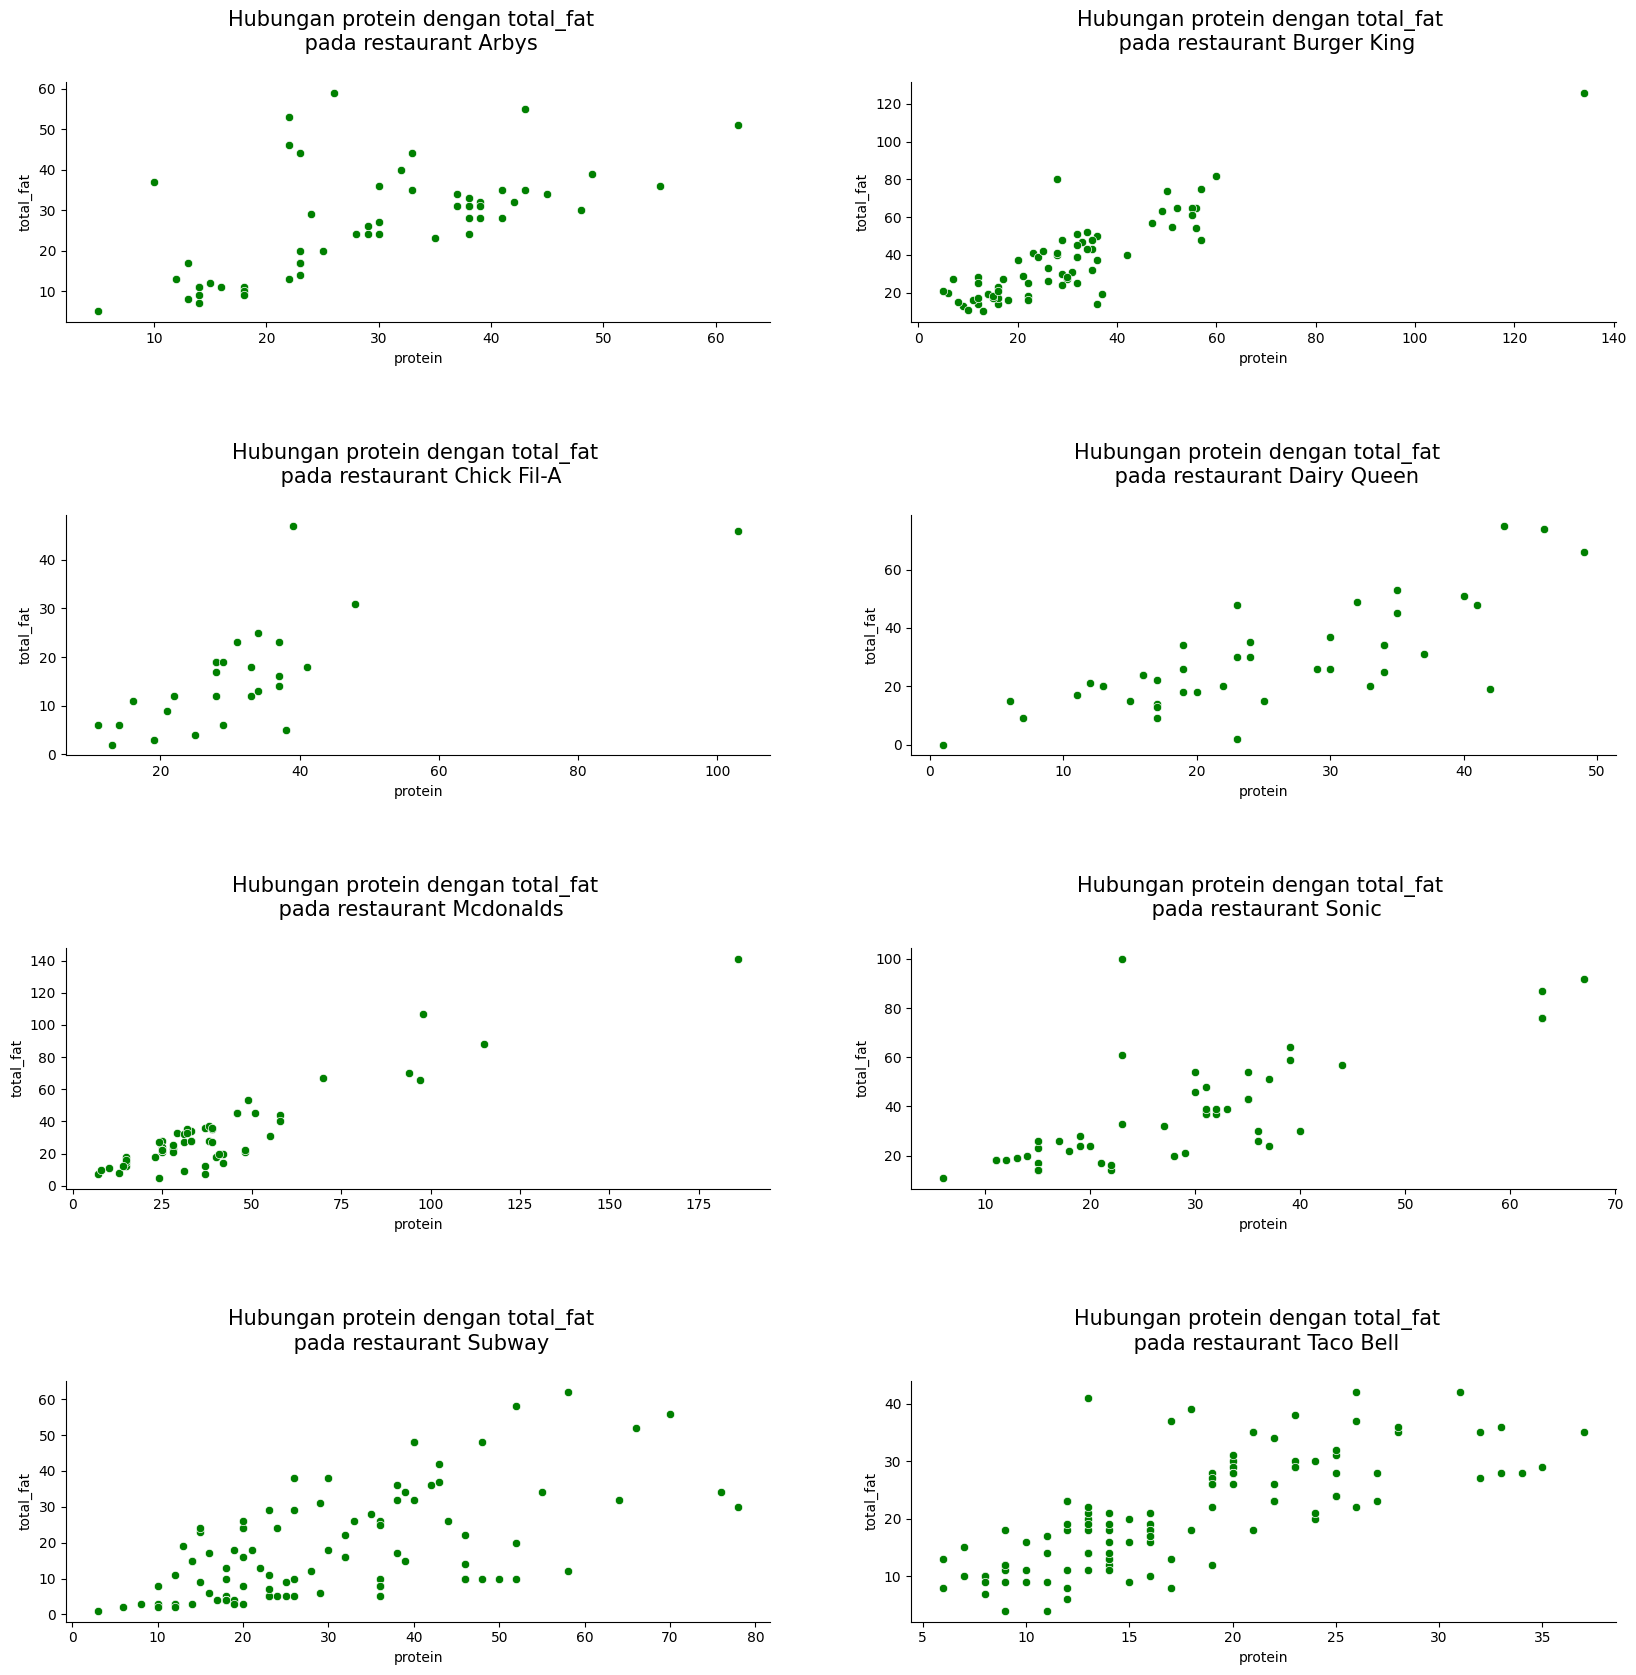

In [ ]:
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(4,2)
plt.subplots_adjust(hspace = 0.8)
tabel1 = fig.add_subplot(gs[0,0])
sns.scatterplot(data=df[df.restaurant=='Arbys'], x="protein", y="total_fat", color='green')
plt.title('Hubungan protein dengan total_fat  \n pada restaurant Arbys\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[0,1])
sns.scatterplot(data=df[df.restaurant=='Burger King'], x="protein", y="total_fat", color='green')
plt.title('Hubungan protein dengan total_fat \n pada restaurant Burger King\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[1,0])
sns.scatterplot(data=df[df.restaurant=='Chick Fil-A'], x="protein", y="total_fat", color='green')
plt.title('Hubungan protein dengan total_fat \n pada restaurant Chick Fil-A\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[1,1])
sns.scatterplot(data=df[df.restaurant=='Dairy Queen'], x="protein", y="total_fat", color='green')
plt.title('Hubungan protein dengan total_fat  \n pada restaurant Dairy Queen\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[2,0])
sns.scatterplot(data=df[df.restaurant=='Mcdonalds'], x="protein", y="total_fat", color='green')
plt.title('Hubungan protein dengan total_fat \n pada restaurant Mcdonalds\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[2,1])
sns.scatterplot(data=df[df.restaurant=='Sonic'], x="protein", y="total_fat", color='green')
plt.title('Hubungan protein dengan total_fat \n pada restaurant Sonic\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[3,0])
sns.scatterplot(data=df[df.restaurant=='Subway'], x="protein", y="total_fat", color='green')
plt.title('Hubungan protein dengan total_fat  \n pada restaurant Subway\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[3,1])
sns.scatterplot(data=df[df.restaurant=='Taco Bell'], x="protein", y="total_fat", color='green')
plt.title('Hubungan protein dengan total_fat  \n pada restaurant Taco Bell\n', fontsize=15)
sns.despine()

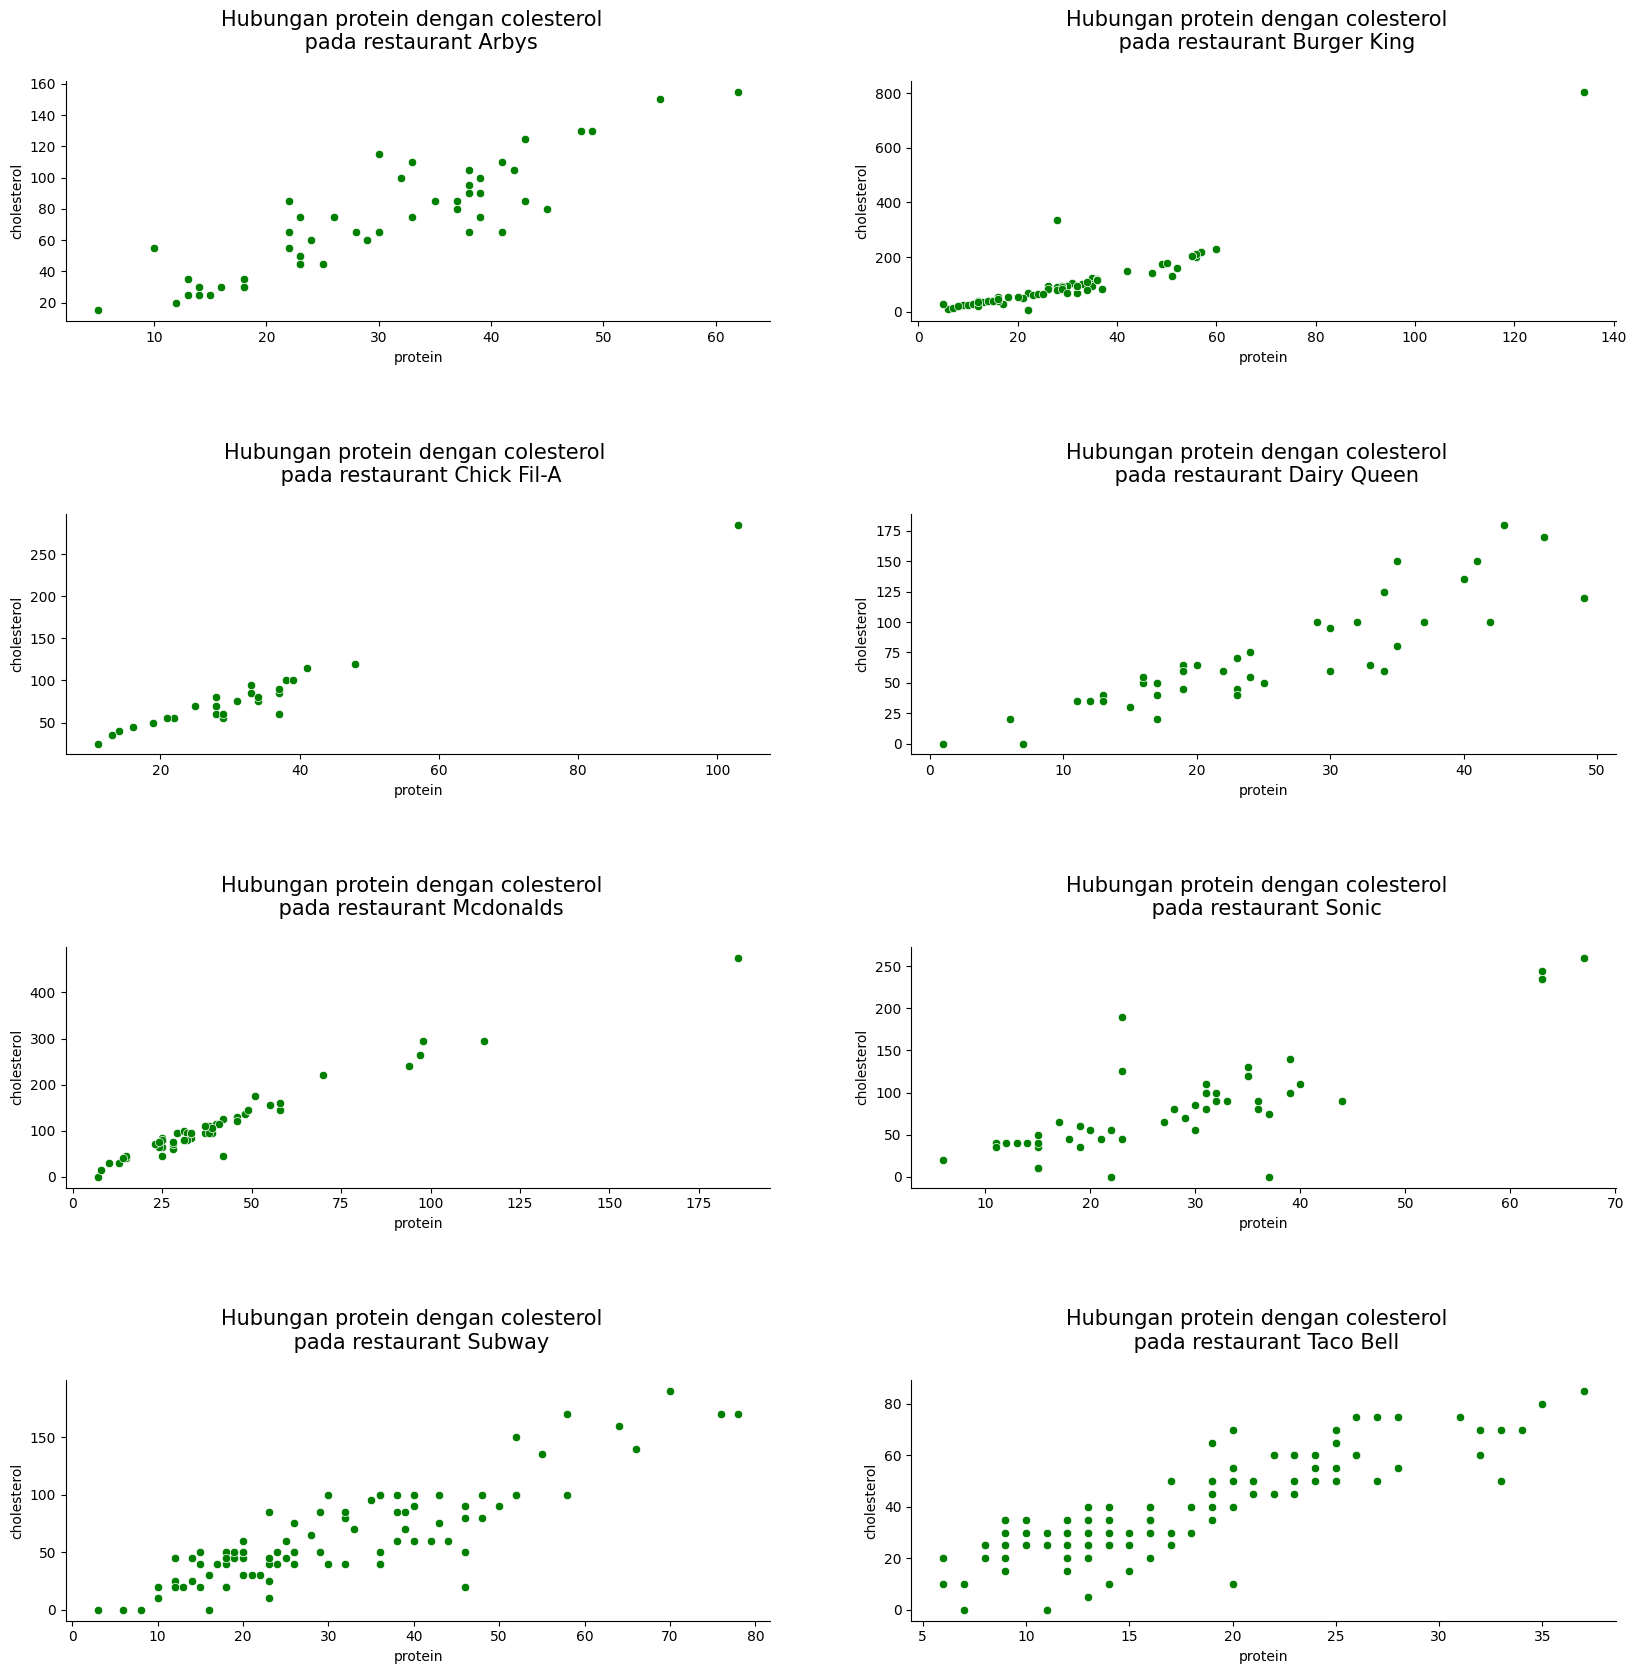

In [ ]:
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(4,2)
plt.subplots_adjust(hspace = 0.8)
tabel1 = fig.add_subplot(gs[0,0])
sns.scatterplot(data=df[df.restaurant=='Arbys'], x="protein", y="cholesterol", color='green')
plt.title('Hubungan protein dengan colesterol  \n pada restaurant Arbys\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[0,1])
sns.scatterplot(data=df[df.restaurant=='Burger King'], x="protein", y="cholesterol", color='green')
plt.title('Hubungan protein dengan colesterol  \n pada restaurant Burger King\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[1,0])
sns.scatterplot(data=df[df.restaurant=='Chick Fil-A'], x="protein", y="cholesterol", color='green')
plt.title('Hubungan protein dengan colesterol \n pada restaurant Chick Fil-A\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[1,1])
sns.scatterplot(data=df[df.restaurant=='Dairy Queen'], x="protein", y="cholesterol", color='green')
plt.title('Hubungan protein dengan colesterol  \n pada restaurant Dairy Queen\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[2,0])
sns.scatterplot(data=df[df.restaurant=='Mcdonalds'], x="protein", y="cholesterol", color='green')
plt.title('Hubungan protein dengan colesterol  \n pada restaurant Mcdonalds\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[2,1])
sns.scatterplot(data=df[df.restaurant=='Sonic'], x="protein", y="cholesterol", color='green')
plt.title('Hubungan protein dengan colesterol  \n pada restaurant Sonic\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[3,0])
sns.scatterplot(data=df[df.restaurant=='Subway'], x="protein", y="cholesterol", color='green')
plt.title('Hubungan protein dengan colesterol  \n pada restaurant Subway\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[3,1])
sns.scatterplot(data=df[df.restaurant=='Taco Bell'], x="protein", y="cholesterol", color='green')
plt.title('Hubungan protein dengan colesterol  \n pada restaurant Taco Bell\n', fontsize=15)
sns.despine()

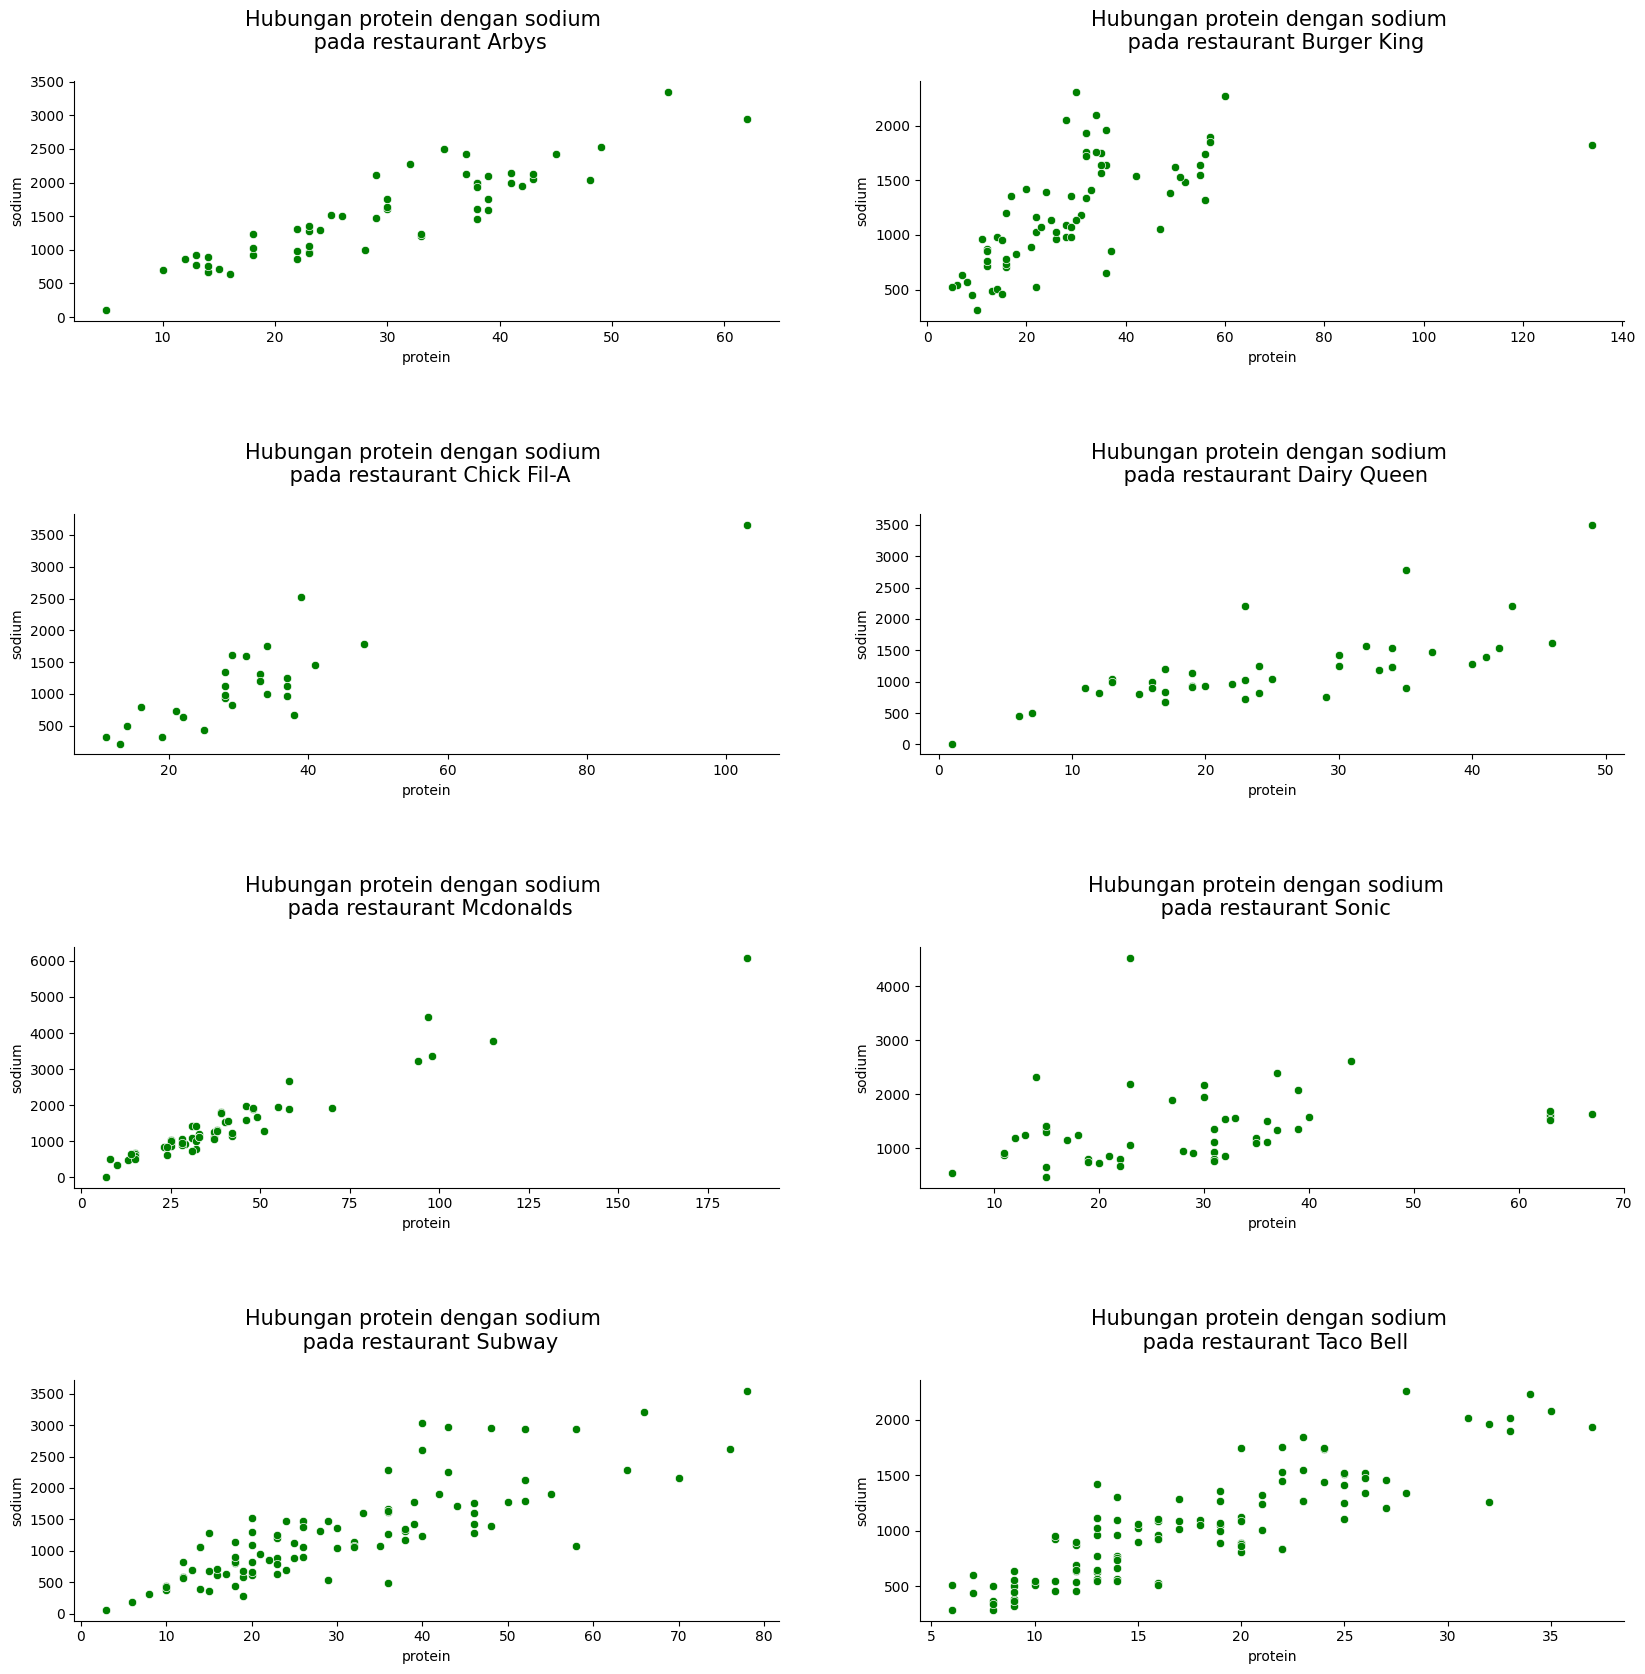

In [ ]:
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(4,2)
plt.subplots_adjust(hspace = 0.8)
tabel1 = fig.add_subplot(gs[0,0])
sns.scatterplot(data=df[df.restaurant=='Arbys'], x="protein", y="sodium", color='green')
plt.title('Hubungan protein dengan sodium \n pada restaurant Arbys\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[0,1])
sns.scatterplot(data=df[df.restaurant=='Burger King'], x="protein", y="sodium", color='green')
plt.title('Hubungan protein dengan sodium \n pada restaurant Burger King\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[1,0])
sns.scatterplot(data=df[df.restaurant=='Chick Fil-A'], x="protein", y="sodium", color='green')
plt.title('Hubungan protein dengan sodium \n pada restaurant Chick Fil-A\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[1,1])
sns.scatterplot(data=df[df.restaurant=='Dairy Queen'], x="protein", y="sodium", color='green')
plt.title('Hubungan protein dengan sodium \n pada restaurant Dairy Queen\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[2,0])
sns.scatterplot(data=df[df.restaurant=='Mcdonalds'], x="protein", y="sodium", color='green')
plt.title('Hubungan protein dengan sodium \n pada restaurant Mcdonalds\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[2,1])
sns.scatterplot(data=df[df.restaurant=='Sonic'], x="protein", y="sodium", color='green')
plt.title('Hubungan protein dengan sodium  \n pada restaurant Sonic\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[3,0])
sns.scatterplot(data=df[df.restaurant=='Subway'], x="protein", y="sodium", color='green')
plt.title('Hubungan protein dengan sodium \n pada restaurant Subway\n', fontsize=15)
sns.despine()
tabel1 = fig.add_subplot(gs[3,1])
sns.scatterplot(data=df[df.restaurant=='Taco Bell'], x="protein", y="sodium", color='green')
plt.title('Hubungan protein dengan sodium \n pada restaurant Taco Bell\n', fontsize=15)
sns.despine()

<Axes: xlabel='protein', ylabel='restaurant'>

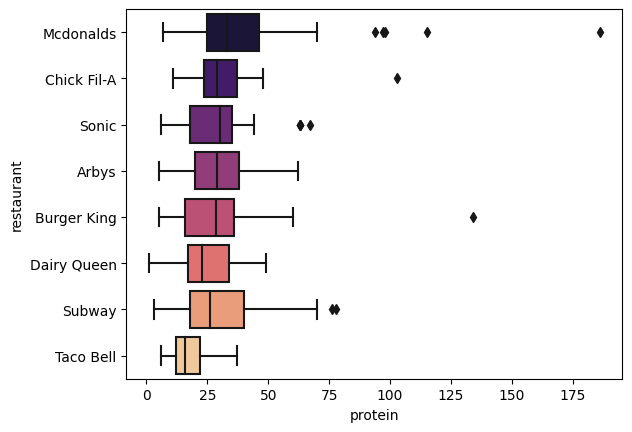

In [ ]:
sns.boxplot(data=dfcop, x="protein", y="restaurant", palette='magma')

ourliernya mau diilangin kaga yak

# HANDLING OUTLIER

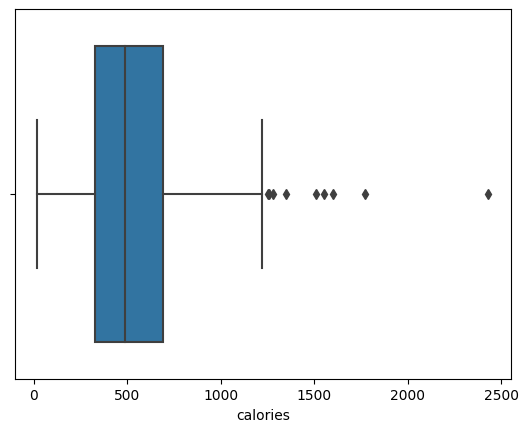

In [ ]:
sns.boxplot(x=df['calories']);

In [ ]:
cek1 = dfcop.loc[(dfcop['calories']>1500)]
cek1

,restaurant,item,calories,cal_fat,total_fat,cholesterol,sodium,protein
38,Mcdonalds,12 piece Buttermilk Crispy Chicken Tenders,1510,790,88,295,3770,115.0
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430,1270,141,475,6080,186.0
44,Mcdonalds,40 piece Chicken McNuggets,1770,960,107,295,3370,98.0
47,Mcdonalds,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,1600,600,66,265,4450,97.0
192,Burger King,American Brewhouse King,1550,1134,126,805,1820,134.0


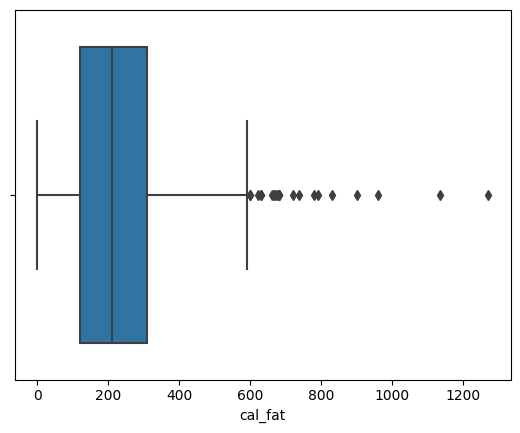

In [ ]:
sns.boxplot(x=df['cal_fat']);

In [ ]:
cek2 = dfcop.loc[(dfcop['cal_fat']>900)]
cek2

,restaurant,item,calories,cal_fat,total_fat,cholesterol,sodium,protein
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430,1270,141,475,6080,186.0
44,Mcdonalds,40 piece Chicken McNuggets,1770,960,107,295,3370,98.0
192,Burger King,American Brewhouse King,1550,1134,126,805,1820,134.0


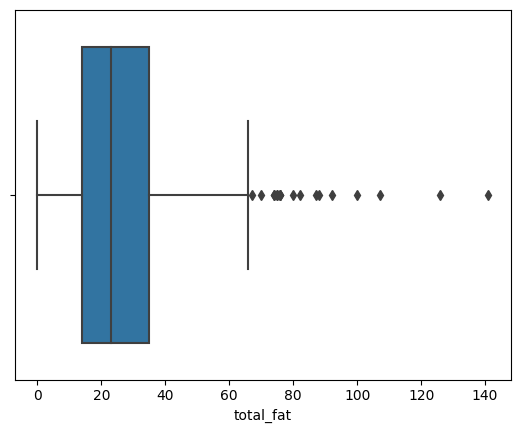

In [ ]:
sns.boxplot(x=df['total_fat']);

In [ ]:
cek3 = dfcop.loc[(dfcop['total_fat']>120)]
cek3

,restaurant,item,calories,cal_fat,total_fat,cholesterol,sodium,protein
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430,1270,141,475,6080,186.0
192,Burger King,American Brewhouse King,1550,1134,126,805,1820,134.0


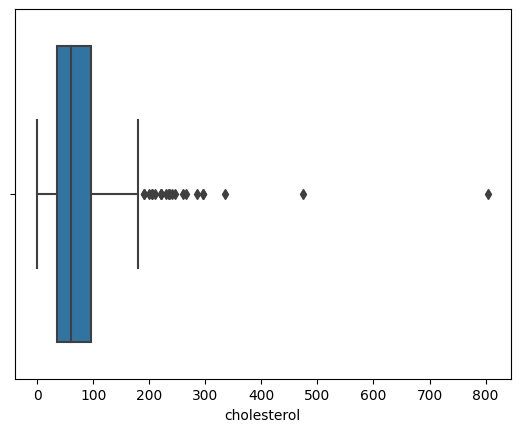

In [ ]:
sns.boxplot(x=df['cholesterol']);

In [ ]:
cek4 = dfcop.loc[(dfcop['cholesterol']>490)]
cek4

,restaurant,item,calories,cal_fat,total_fat,cholesterol,sodium,protein
192,Burger King,American Brewhouse King,1550,1134,126,805,1820,134.0


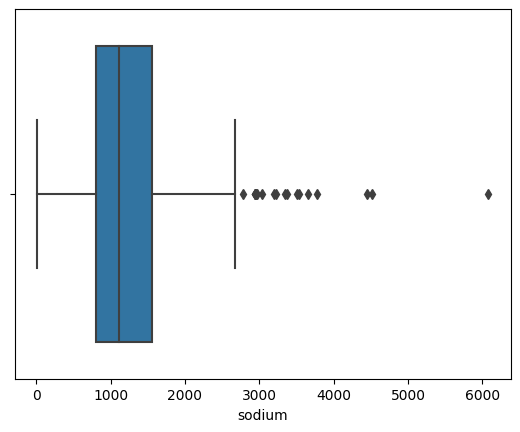

In [ ]:
sns.boxplot(x=df['sodium']);

In [ ]:
cek5 = dfcop.loc[(dfcop['sodium']>4000)]
cek5

,restaurant,item,calories,cal_fat,total_fat,cholesterol,sodium,protein
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430,1270,141,475,6080,186.0
47,Mcdonalds,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,1600,600,66,265,4450,97.0
114,Sonic,Buffalo Dunked Ultimate Chicken Sandwich,1000,550,61,125,4520,23.0


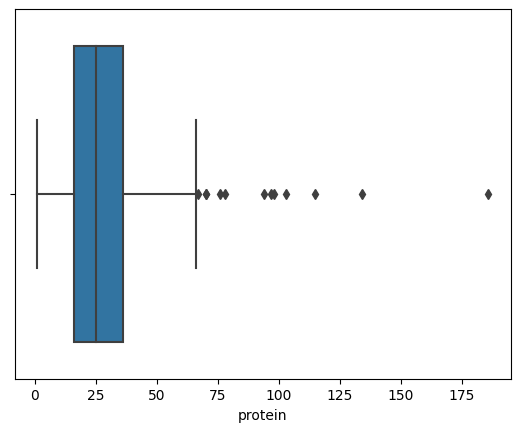

In [ ]:
sns.boxplot(x=df['protein']);


In [ ]:
cek6 = dfcop.loc[(dfcop['protein']>120)]
cek6

,restaurant,item,calories,cal_fat,total_fat,cholesterol,sodium,protein
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430,1270,141,475,6080,186.0
192,Burger King,American Brewhouse King,1550,1134,126,805,1820,134.0


# # # **DATA PREDICTION**

Menghapus kolom yang bertipe string

In [ ]:
dfix = dfcop.copy()

In [ ]:
dfix = dfix.drop(['restaurant','item'], axis = 'columns')
dfix

,calories,cal_fat,total_fat,cholesterol,sodium,protein
0,380,60,7,95,1110,37.0
1,840,410,45,130,1580,46.0
2,1130,600,67,220,1920,70.0
3,750,280,31,155,1940,55.0
4,920,410,45,120,1980,46.0
...,...,...,...,...,...,...
510,780,340,38,50,1850,23.0
511,580,260,29,60,1270,23.0
512,780,380,42,60,1340,26.0
513,720,320,35,70,1260,32.0


TAKE VARIABEL X AND Y FOR MODELLING

In [ ]:
X = dfix.drop(['protein'], axis = 1)
y = dfix['protein']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (412, 5)
y_train:  (412,)
X_test:  (103, 5)
y_test:  (103,)


In [ ]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(X_train, y_train)
sklearn_y_predictions = sklearn_model.predict(X_train)
sklearn_y_predictionsTest = sklearn_model.predict(X_test)
sklearn_y_predictions.shape

(412,)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_train, sklearn_y_predictions)

0.9019152460909051

In [ ]:
r2_score(y_test, sklearn_y_predictionsTest)

0.8447862739347018

MAKING PREDICTION SHEET

**IN THE TEST CASE**

In [ ]:
y_predict = pd.DataFrame(sklearn_y_predictionsTest, columns=['Protein_Predict'])
y_predict.head()

,Protein_Predict
0,24.528812
1,60.685635
2,75.759785
3,62.495891
4,14.649259


In [ ]:
y_real = pd.DataFrame(y_test)
y_real = y_real.reset_index(drop=True)
y_real.head()

,protein
0,20.0
1,63.0
2,94.0
3,58.0
4,12.0


In [ ]:
dfsheet = pd.concat([y_real, y_predict], axis=1)
dfsheet

,protein,Protein_Predict
0,20.0,24.528812
1,63.0,60.685635
2,94.0,75.759785
3,58.0,62.495891
4,12.0,14.649259
...,...,...
98,38.0,34.867606
99,19.0,16.090442
100,28.0,27.351333
101,28.0,22.675647


In [ ]:
cek7 = dfsheet.loc[(dfsheet['Protein_Predict']>80)]
cek7

,protein,Protein_Predict
25,27.891051,84.551408


harus dibasmi sih


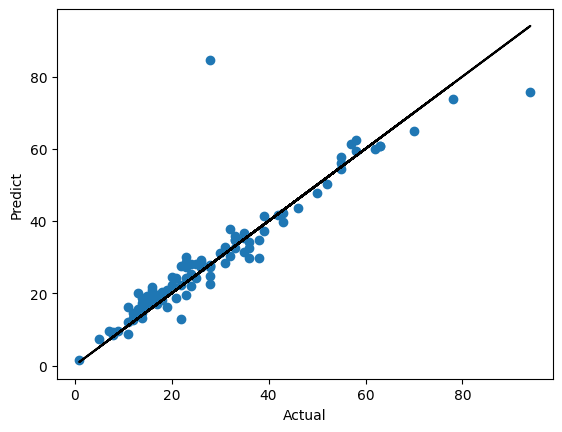

In [ ]:
fig, ax = plt.subplots()
ax.plot(y_test, y_test, color ='black')

ax.scatter(y_test, sklearn_y_predictionsTest)
ax.set_xlabel('Actual')
ax.set_ylabel('Predict')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
mean_absolute_error(dfsheet['protein'],dfsheet['Protein_Predict'])

3.2653019307487994

In [ ]:
mean_absolute_percentage_error(dfsheet['protein'],dfsheet['Protein_Predict'])

0.14582888138785075

In [ ]:
mean_squared_error(dfsheet['protein'],dfsheet['Protein_Predict'])

44.252440967918524

**IN THE REAL CASE**

In [ ]:
X_train2 = X
y_train2 = y

In [ ]:
X_train2.shape
y_train2.shape

(515,)

In [ ]:
sklearn_model = LinearRegression().fit(X_train2, y_train2)
sklearn_y_predictions11 = sklearn_model.predict(X_train2)

In [ ]:
data_predict["protein_predict"] = sklearn_y_predictions11
data_predict

,restaurant,item,calories,cal_fat,total_fat,cholesterol,sodium,protein,protein_predict
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,95,1110,37.0,36.509445
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,130,1580,46.0,42.887990
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,220,1920,70.0,62.663374
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,155,1940,55.0,54.203982
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,120,1980,46.0,46.021947
...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,50,1850,23.0,29.945232
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,60,1270,23.0,26.048610
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,60,1340,26.0,26.818357
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,70,1260,32.0,29.696724


In [ ]:
r2_score(data_predict["protein"], sklearn_y_predictions11)

0.8920364273764987

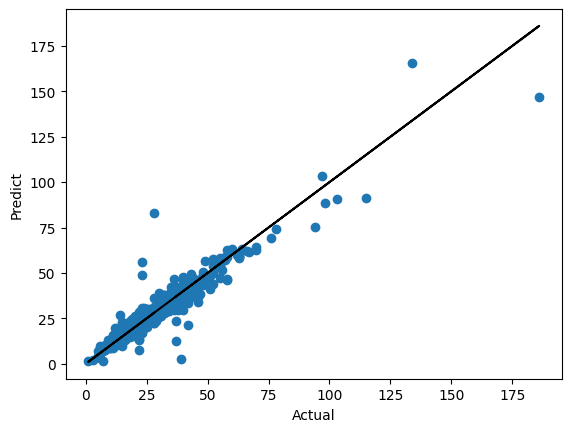

In [ ]:
fig, ax = plt.subplots()
ax.plot(data_predict["protein"], data_predict["protein"], color ='black')

ax.scatter(data_predict["protein"], sklearn_y_predictions11)
ax.set_xlabel('Actual')
ax.set_ylabel('Predict')
plt.show()

In [ ]:
mean_absolute_percentage_error(data_predict["protein"],data_predict['protein_predict'])

0.13296067453701083